<center><b>SALES DATA ANALYSIS</b></center>

## Importing the appropriate libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os import listdir

plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [103]:
# from os import listdir
df = pd.read_csv('Sales_Data/Sales_April_2019.csv')
# df.head()

files = [file for file in os.listdir('./Sales_Data')]

months_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    months_df = pd.concat([months_df, df])

months_df.to_csv('all_data', index=False)

In [104]:
# df = pd.read_csv('all_data.csv')
# df.head()
months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [105]:
months_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [106]:
months_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [107]:
#checking percentage of null values across the dataframe
months_df.isna().sum()/len(months_df) *100

Order ID           0
Product            0
Quantity Ordered   0
Price Each         0
Order Date         0
Purchase Address   0
dtype: float64

### Cleaning the Data

***Checking for rows with missing values***

In [69]:
# finding rows with missing values
nan_df = months_df[months_df.isnull().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


***dropping rows with missing values***

In [70]:
# dropping the rows with missing values, especially since the percentage of rows having null values are very small compared to the whole dataframe
months_df = months_df.dropna(how='all')
months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [71]:
months_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [72]:
months_df.columns = months_df.columns.str.lower()
months_df.columns

Index(['order id', 'product', 'quantity ordered', 'price each', 'order date',
       'purchase address'],
      dtype='object')

In [73]:
months_df = months_df[months_df['quantity ordered'] != 'Quantity Ordered']
months_df.head(10)

,order id,product,quantity ordered,price each,order date,purchase address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


***Converting the Quantity Ordered and Price Eaach as well as the Order ID columns to int or numerical format instead of objects***

In [74]:
months_df['quantity ordered'] = pd.to_numeric(months_df['quantity ordered'])
months_df['price each'] = pd.to_numeric(months_df['price each'])
months_df['order id'] = pd.to_numeric(months_df['order id'])
# months_df['order_id'] = pd.to_numeric(months_df['order id'])
# months_df.drop(months_df['order_id'], axis=1)

***converting the order date column from object to date value***

In [75]:
months_df['order date'] = pd.to_datetime(months_df['order date'], format='mixed')
months_df['order date']

0       2019-04-19 08:46:00
2       2019-04-07 22:30:00
3       2019-04-12 14:38:00
4       2019-04-12 14:38:00
5       2019-04-30 09:27:00
                ...        
11681   2019-09-17 20:56:00
11682   2019-09-01 16:00:00
11683   2019-09-23 07:39:00
11684   2019-09-19 17:30:00
11685   2019-09-30 00:18:00
Name: order date, Length: 185950, dtype: datetime64[ns]

### Creating the order year column

In [76]:
months_df['order year'] = months_df['order date'].dt.year
months_df['order year']

0        2019
2        2019
3        2019
4        2019
5        2019
         ... 
11681    2019
11682    2019
11683    2019
11684    2019
11685    2019
Name: order year, Length: 185950, dtype: int32

### Creating the order month column

In [77]:
months_df['order month'] = months_df['order date'].dt.month
months_df['order month']

0        4
2        4
3        4
4        4
5        4
        ..
11681    9
11682    9
11683    9
11684    9
11685    9
Name: order month, Length: 185950, dtype: int32

### Creating the hour column

In [78]:
months_df['hour'] = months_df['order date'].dt.hour
months_df['minute'] = months_df['order date'].dt.minute
months_df['count'] = 1
months_df.head()

,order id,product,quantity ordered,price each,order date,purchase address,order year,order month,hour,minute,count
0,176558,USB-C Charging Cable,2,12,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,1
2,176559,Bose SoundSport Headphones,1,100,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,1
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,1
4,176560,Wired Headphones,1,12,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,1
5,176561,Wired Headphones,1,12,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,1


In [79]:
months_df.head()

,order id,product,quantity ordered,price each,order date,purchase address,order year,order month,hour,minute,count
0,176558,USB-C Charging Cable,2,12,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,1
2,176559,Bose SoundSport Headphones,1,100,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,1
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,1
4,176560,Wired Headphones,1,12,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,1
5,176561,Wired Headphones,1,12,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,1


In [80]:
months_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order id          185950 non-null  int64         
 1   product           185950 non-null  object        
 2   quantity ordered  185950 non-null  int64         
 3   price each        185950 non-null  float64       
 4   order date        185950 non-null  datetime64[ns]
 5   purchase address  185950 non-null  object        
 6   order year        185950 non-null  int32         
 7   order month       185950 non-null  int32         
 8   hour              185950 non-null  int32         
 9   minute            185950 non-null  int32         
 10  count             185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(3), object(2)
memory usage: 14.2+ MB


In [81]:
months_df.head()

,order id,product,quantity ordered,price each,order date,purchase address,order year,order month,hour,minute,count
0,176558,USB-C Charging Cable,2,12,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,1
2,176559,Bose SoundSport Headphones,1,100,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,1
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,1
4,176560,Wired Headphones,1,12,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,1
5,176561,Wired Headphones,1,12,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,1


### creating the city column

In [82]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
months_df['city'] = months_df['purchase address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
months_df['city']



0                Dallas (TX)
2                Boston (MA)
3           Los Angeles (CA)
4           Los Angeles (CA)
5           Los Angeles (CA)
                ...         
11681       Los Angeles (CA)
11682     San Francisco (CA)
11683     San Francisco (CA)
11684     San Francisco (CA)
11685     San Francisco (CA)
Name: city, Length: 185950, dtype: object

#### Add a Sales Column

In [83]:
months_df['sales'] = months_df['quantity ordered'] * months_df['price each']
months_df['sales']

0        24
2       100
3       600
4        12
5        12
         ..
11681     9
11682   700
11683   700
11684   380
11685    12
Name: sales, Length: 185950, dtype: float64

#### Question #1: What was the best month for sales?

In [84]:
months_df.head(2)

,order id,product,quantity ordered,price each,order date,purchase address,order year,order month,hour,minute,count,city,sales
0,176558,USB-C Charging Cable,2,12,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,1,Dallas (TX),24
2,176559,Bose SoundSport Headphones,1,100,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,1,Boston (MA),100


In [85]:
# To display whole numbers instead of floats
pd.set_option('display.float_format', '{:,.0f}'.format)

In [86]:
salesBestMonth = months_df.groupby('order month')['sales'].sum()
salesBestMonth

order month
1    1,822,257
2    2,202,022
3    2,807,100
4    3,390,670
5    3,152,607
6    2,577,802
7    2,647,776
8    2,244,468
9    2,097,560
10   3,736,727
11   3,199,603
12   4,613,443
Name: sales, dtype: float64

#### Horizontal Bar Chart Displaying the distribution of profit by month

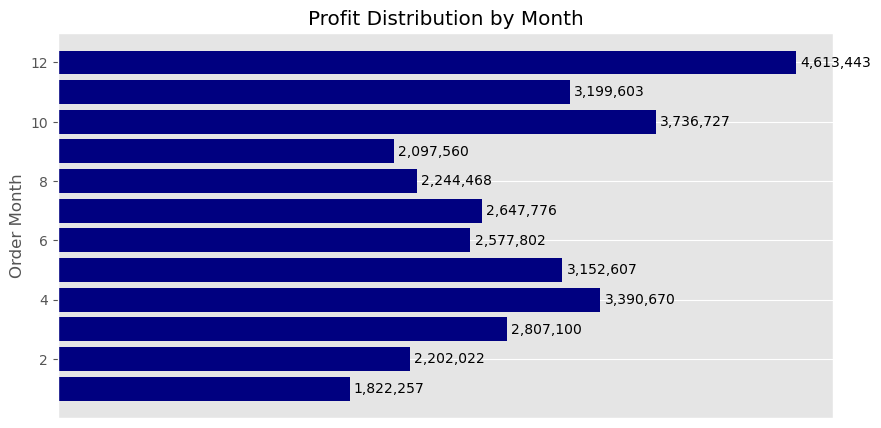

In [87]:
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.barh(salesBestMonth.index, salesBestMonth, color='navy')

# label formatting
ax.bar_label(bars, [f'{value:,.0f}' for value in salesBestMonth], padding = 3)
plt.title('Profit Distribution by Month')
plt.ylabel('Order Month')
plt.xticks(ticks=[])
plt.show()

In [88]:
salesBestMonth.nlargest(5).sort_values(ascending=True)

order month
5    3,152,607
11   3,199,603
4    3,390,670
10   3,736,727
12   4,613,443
Name: sales, dtype: float64

<b>To answer the question of which one is the best month for sale; from the chart above and the analysis beneath it, we can deduce that the best month for sale was December with a total sales of over $4.6m. </b>

<b>This was followed by the  month of  October with over  $3.7m in total sales </b>

### Question #2: What city sold the most product?

In [89]:
months_df.head(2)

,order id,product,quantity ordered,price each,order date,purchase address,order year,order month,hour,minute,count,city,sales
0,176558,USB-C Charging Cable,2,12,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,1,Dallas (TX),24
2,176559,Bose SoundSport Headphones,1,100,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,1,Boston (MA),100


To answer this question, we are going to be grouping the city by the total sum of sales in order to know which city sold the most product

In [90]:

city_by_sales = months_df.groupby('city')['sales'].sum().sort_values(ascending = True)
city_by_sales

city
Portland (ME)          449,758
Austin (TX)          1,819,582
Portland (OR)        1,870,732
Seattle (WA)         2,747,755
Dallas (TX)          2,767,975
Atlanta (GA)         2,795,499
Boston (MA)          3,661,642
New York City (NY)   4,664,317
Los Angeles (CA)     5,452,571
San Francisco (CA)   8,262,204
Name: sales, dtype: float64

In [91]:
# city_sales.idxmax()
city_with_hihest_product_sales = city_by_sales.nlargest(1)
city_with_hihest_product_sales

city
San Francisco (CA)   8,262,204
Name: sales, dtype: float64

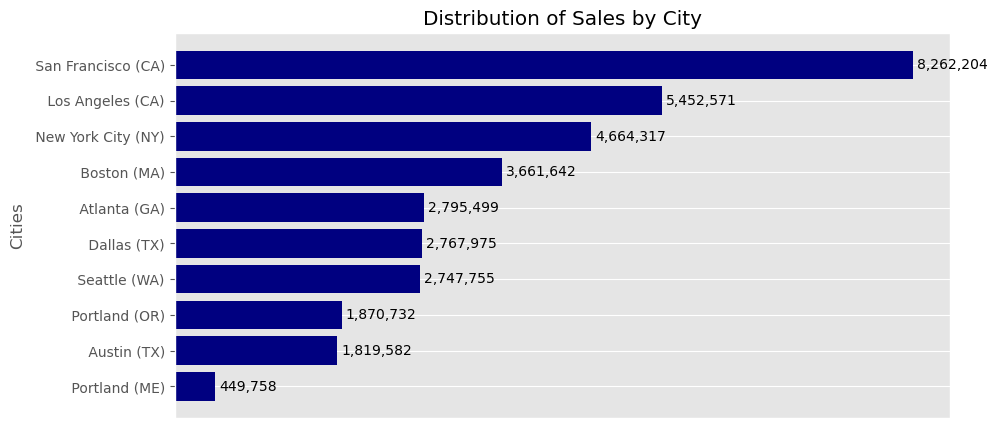

In [92]:
fig, ax = plt.subplots(figsize=(10,5))
bars = ax.barh(city_by_sales.index, city_by_sales, color='navy')

# list formatting
ax.bar_label(bars, [f'{value:,.0f}' for value in city_by_sales], padding = 3)
plt.title('Distribution of Sales by City')
plt.xticks(ticks=[])
plt.ylabel('Cities')
plt.show()

***The city with the highest product sales is San Francisco (CA) with a total sales of over $8.2m.***

#### Question #3: What time should we display advertisements to maximize the likelihood of purchases?

In [93]:
months_df.head(3)

,order id,product,quantity ordered,price each,order date,purchase address,order year,order month,hour,minute,count,city,sales
0,176558,USB-C Charging Cable,2,12,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,1,Dallas (TX),24
2,176559,Bose SoundSport Headphones,1,100,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,1,Boston (MA),100
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,1,Los Angeles (CA),600


In [94]:
hourly_count_of_qantity_ordered = months_df.groupby(['hour']).count()['quantity ordered']
hourly_count_of_qantity_ordered

hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: quantity ordered, dtype: int64

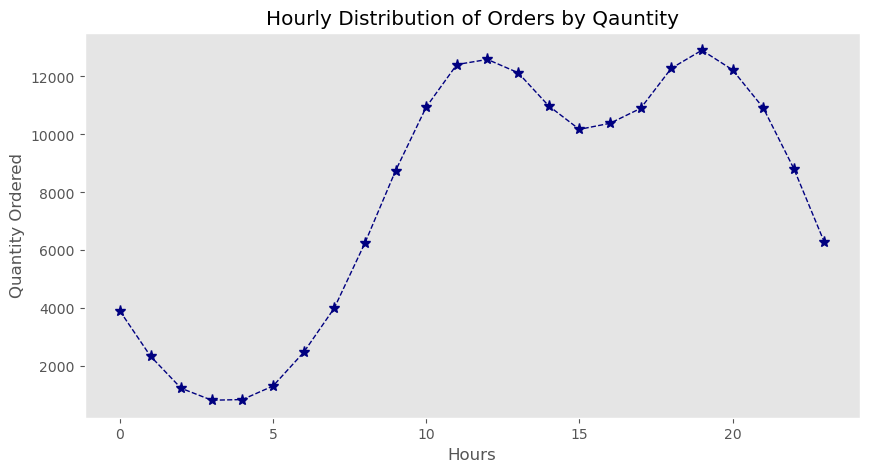

In [95]:
fig, ax = plt.subplots(figsize=(10,5))

# hours = [h for h, df in months_df.groupby(['hour'])]

plt.plot(hourly_count_of_qantity_ordered.index, hourly_count_of_qantity_ordered, color='navy', lw=1, ls='--', marker='*', markersize=8)
plt.title('Hourly Distribution of Orders by Qauntity')
plt.ylabel('Quantity Ordered')
plt.xlabel('Hours')
plt.grid()
plt.show()

***From the chart above, I will suggest between the hours of 11am and 8pm. These two period of time are the best time to display advertisement in order to maximize the likelihood of purchase.***  

### Question #4: What products are most often sold together?

In [96]:
months_df.head(3)

,order id,product,quantity ordered,price each,order date,purchase address,order year,order month,hour,minute,count,city,sales
0,176558,USB-C Charging Cable,2,12,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,1,Dallas (TX),24
2,176559,Bose SoundSport Headphones,1,100,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,1,Boston (MA),100
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,1,Los Angeles (CA),600


In [97]:
df = months_df[months_df['order id'].duplicated(keep=False)]
df.head()

,order id,product,quantity ordered,price each,order date,purchase address,order year,order month,hour,minute,count,city,sales
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,1,Los Angeles (CA),600
4,176560,Wired Headphones,1,12,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,1,Los Angeles (CA),12
18,176574,Google Phone,1,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",2019,4,19,42,1,Los Angeles (CA),600
19,176574,USB-C Charging Cable,1,12,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",2019,4,19,42,1,Los Angeles (CA),12
30,176585,Bose SoundSport Headphones,1,100,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",2019,4,11,31,1,Boston (MA),100


In [98]:
# df['Grouped'] = df.groupby('order id')['product'].transform(lambda x: ','.join(x))
# df2 = df[['order id', 'Grouped']].drop_duplicates()
# df2
df2 = df.groupby('order id')['product'].apply(lambda x: ','.join(x)).reset_index()
df2

,order id,product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
7131,319536,"Macbook Pro Laptop,Wired Headphones"
7132,319556,"Google Phone,Wired Headphones"
7133,319584,"iPhone,Wired Headphones"
7134,319596,"iPhone,Lightning Charging Cable"


In [99]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question #5: What product sold the most? Why do you think it did?

In [100]:
months_df.head()

,order id,product,quantity ordered,price each,order date,purchase address,order year,order month,hour,minute,count,city,sales
0,176558,USB-C Charging Cable,2,12,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,1,Dallas (TX),24
2,176559,Bose SoundSport Headphones,1,100,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,1,Boston (MA),100
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,1,Los Angeles (CA),600
4,176560,Wired Headphones,1,12,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,1,Los Angeles (CA),12
5,176561,Wired Headphones,1,12,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,1,Los Angeles (CA),12


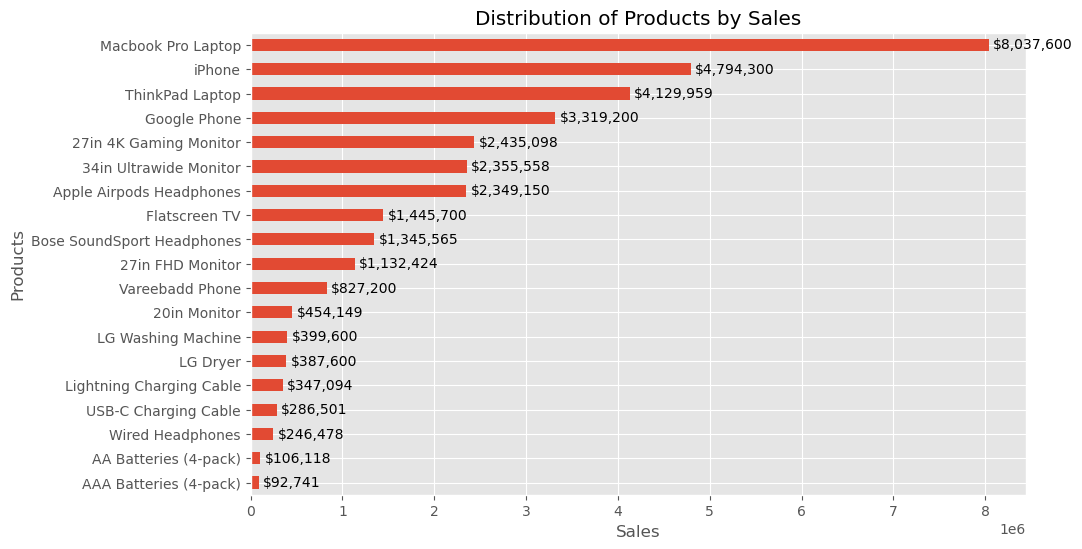

In [101]:
ax = months_df.groupby('product')['sales'].sum()\
                            .sort_values(ascending=True)\
                            .plot(kind='barh',
                                title='Distribution of Products by Sales',
                                 figsize=(10,6))

ax.bar_label(ax.containers[0], fmt='${:,.0f}', padding=3)
ax.set_xlabel('Sales')    
ax.set_ylabel('Products')
plt.show()


<b>As seen from the chart, the most sold product is the MacBook Pro Laptop with over $8m worth of sales.</b>

<b>This is followed by Iphones with $4.7m sales.</b>

<b>ThinkPad Laptop with over $4.1m.
The reason for the high sales of MackBook Pro laptop might be due to the quality of the product; that is, the product features and specs, and most importantly, MackBook Pro has built an absolutely sleek brand that people are ready to purchase their product no matter how expensive it is. It is a product of class and quality</b>